# Beijing Air Quality Forecasting Starter Notebook

In [55]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8

import os

# Create the directory if it doesn't exist
os.makedirs("C:\\Users\\Merveille\\.kaggle", exist_ok=True)

# Write kaggle.json file
with open("C:\\Users\\Merveille\\.kaggle\\kaggle.json", "w") as f:
    f.write('{"username":"merveillekangabire","key":"12573b5c7b1a50c1ad03b1d4923ba262"}')


  Using cached kaggle-1.5.8-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
!pip install python-slugify



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
!pip install --upgrade kaggle


  Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
!pip install tqdm



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
!kaggle datasets list

ref                                                            title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance           Student Habits vs Academic Performance                19512  2025-04-12 10:49:08.663000          33663        605  1.0              
adilshamim8/social-media-addiction-vs-relationships            Students' Social Media Addiction                       7851  2025-05-10 14:38:02.713000           6975        101  1.0              
b'atharvasoundankar/ai-developer-productivity-dataset            \xf0\x9f\xa7\xa0 AI Developer Productivity Dataset                    5992  2025-05-12 08:29:17                  2018         68  1.0              '
kh

In [60]:
import zipfile
import os

zip_path = r"C:\Users\Merveille\notebooks\assignment-1-time-series-forecasting-may-2025.zip"
extract_to = r"C:\Users\Merveille\notebooks\assignment-1"

# Create the destination folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Unzipped successfully to:", extract_to)


✅ Unzipped successfully to: C:\Users\Merveille\notebooks\assignment-1


In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Bidirectional
import tensorflow as tf

In [62]:
# Mount Google Drive to access datasets
test_path = r'C:\Users\Merveille\notebooks\assignment-1\test.csv'
train_path = r'C:\Users\Merveille\notebooks\assignment-1\train.csv'


In [63]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

train.head(5)


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [64]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [65]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [66]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [67]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


In [68]:
train.isnull().values.any()

np.False_

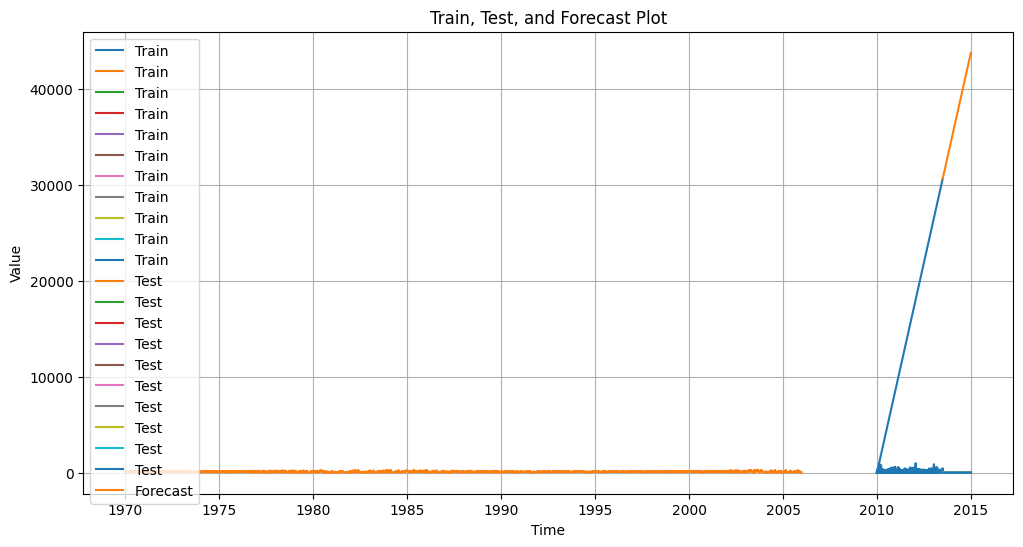

In [69]:
plt.figure(figsize=(12, 6))  # Width=12 inches, Height=6 inches
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Forecast')
plt.legend()
plt.title("Train, Test, and Forecast Plot")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [70]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [71]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
X_train = np.expand_dims(X_train, axis=1)

# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

# model1

Using LSTM, Relu, and dropout of 0.3 

In [72]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout
# define model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model.summary()



C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                  │ (None, 1, 128)          │       70,656 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_11 (Dropout)           │ (None, 1, 128)          │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ lstm_10 (LSTM)                 │ (None, 32)              │       20,608 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_12 (Dropout)           │ (None, 32)              │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_12 (Dense)               │ (None, 32)              │        1,056 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_13 (Dense)               │ (None, 1)               │           33 │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 92,353 (360.75 KB)

 Trainable params: 92,353 (360.75 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Train the model
# You can adjust the number of epochs and batch size to improve performance.
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - lambda: 99.8574 - loss: 10932.1738
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - lambda: 74.0371 - loss: 5782.4160
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - lambda: 72.6338 - loss: 5547.6958
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - lambda: 72.7083 - loss: 5613.7358
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - lambda: 72.5479 - loss: 5571.9263
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - lambda: 73.3956 - loss: 5756.0938
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 72.3757 - loss: 5551.0093
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - lambda: 71.4725 - loss: 5369.0469
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 71.5247 - loss: 5423.1699
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - lambda: 72.9808 - loss: 5639.9858
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - lambda: 71.8748 - loss: 5456.1143
Epoch 12/20
959/959

In [74]:
from sklearn.metrics import mean_squared_error
def evaluate_and_plot_on_train_only(model, history, X_train, y_train, scaler_y=None, model_name='Model'):
    # Predict on training data
    predictions = model.predict(X_train)
    
    # Compute training RMSE
    rmse = mean_squared_error(y_train, predictions)
    
    # Rescale if a scaler was used
    if scaler_y:
        predictions_rescaled = scaler_y.inverse_transform(predictions)
        y_train_rescaled = scaler_y.inverse_transform(y_train)
    else:
        predictions_rescaled = predictions
        y_train_rescaled = y_train

    # Plot: Actual vs Predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_train_rescaled, label='Actual')
    plt.plot(predictions_rescaled, label='Predicted')
    plt.title(f'{model_name} - Predictions vs Actuals\nRMSE: {rmse:.4f}')
    plt.xlabel('Time Step')
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot: Training loss per epoch
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.axhline(y=mean_squared_error(y_train, predictions), color='blue', linestyle='--', label='Final Train MSE')
    plt.title(f'{model_name} - Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"[{model_name}] Final Training RMSE: {rmse:.4f}")

959/959 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


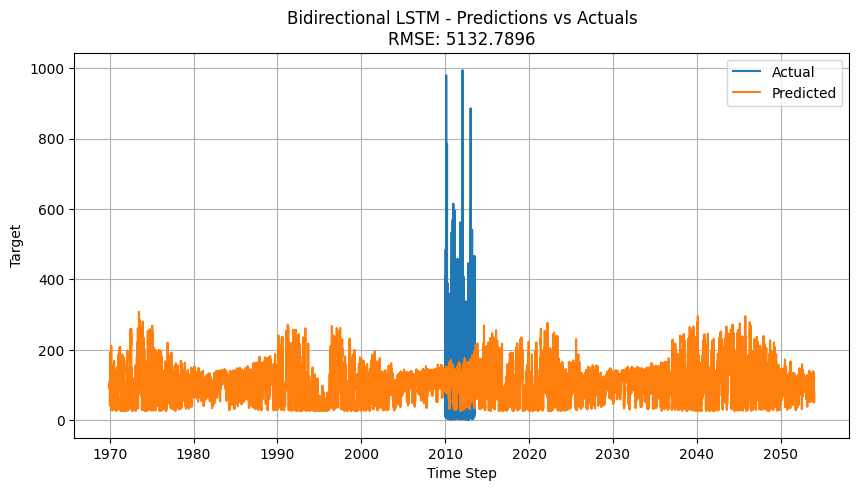

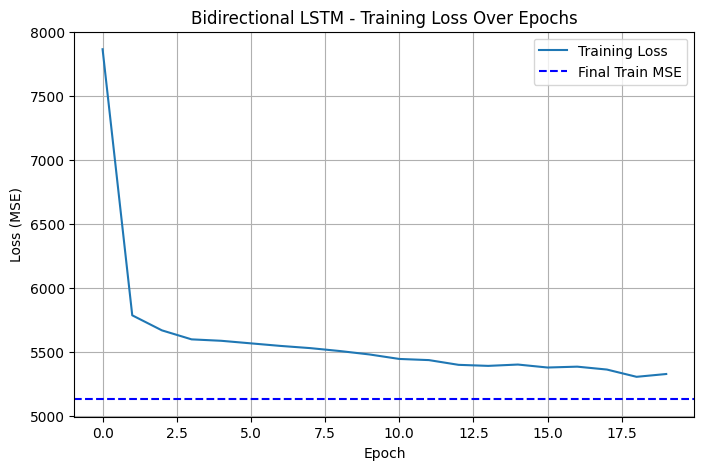

[Bidirectional LSTM] Final Training RMSE: 5132.7896


In [75]:
evaluate_and_plot_on_train_only(
    model, history, X_train, y_train,
    scaler_y=None,
    model_name='Bidirectional LSTM'
)


# model2

This model uses a mixture of GRU and LSTM

In [76]:
model2 = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    GRU(32, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model.summary()


C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                  │ (None, 1, 128)          │       70,656 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_11 (Dropout)           │ (None, 1, 128)          │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ lstm_10 (LSTM)                 │ (None, 32)              │       20,608 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_12 (Dropout)           │ (None, 32)              │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_12 (Dense)               │ (None, 32)              │        1,056 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_13 (Dense)               │ (None, 1)               │           33 │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 277,061 (1.06 MB)

 Trainable params: 92,353 (360.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184,708 (721.52 KB)

In [77]:
history = model2.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - lambda: 98.5872 - loss: 10677.6777
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - lambda: 73.7256 - loss: 5756.4395
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - lambda: 74.2866 - loss: 5876.1514
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - lambda: 73.4315 - loss: 5738.1646
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - lambda: 73.2731 - loss: 5704.6152
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - lambda: 71.3012 - loss: 5380.8198
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - lambda: 71.5316 - loss: 5416.7051
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - lambda: 72.2199 - loss: 5505.7974
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - lambda: 70.4129 - loss: 5228.7783
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - lambda: 71.6612 - loss: 5392.8267
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - lambda: 71.6183 - loss: 5404.2485
Epoch 12/20
959/959 ━━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


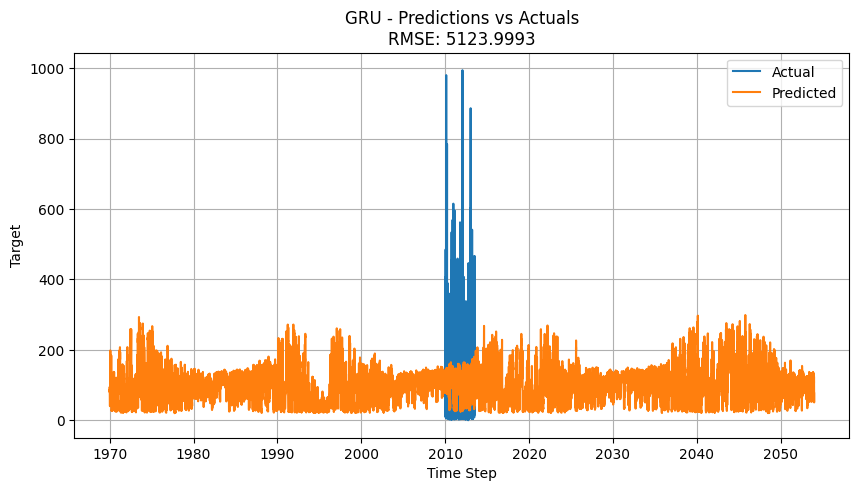

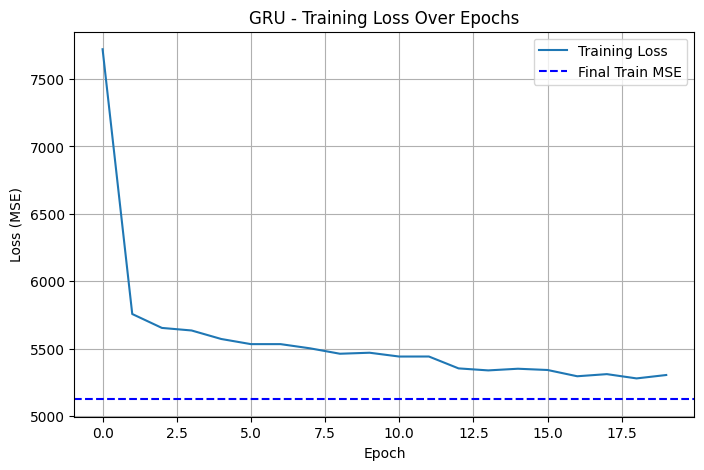

[GRU] Final Training RMSE: 5123.9993


In [78]:
evaluate_and_plot_on_train_only(
    model2, history, X_train, y_train,
    scaler_y=None,
    model_name='GRU'
)

# model3

This model uses a mixture of GRU and  bidirectional LSTM

In [79]:
model3 = Sequential([
    Bidirectional(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    GRU(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model3.compile(
    optimizer=Adam(learning_rate=0.007),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model3.summary()

C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ bidirectional_4                │ ?                       │  0 (unbuilt) │
│ (Bidirectional)                │                         │              │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_15 (Dropout)           │ ?                       │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ gru_4 (GRU)                    │ ?                       │  0 (unbuilt) │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_16 (Dropout)           │ ?                       │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_16 (Dense)               │ ?                       │  0 (unbuilt) │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_17 (Dense)               │ ?                       │  0 (unbuilt) │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
history = model3.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - lambda: 84.5390 - loss: 7906.4092
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 72.5110 - loss: 5556.9741
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - lambda: 72.0531 - loss: 5484.4780
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 69.9759 - loss: 5191.7197
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 70.4139 - loss: 5237.3042
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - lambda: 70.1164 - loss: 5215.9668
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 71.3831 - loss: 5429.3413
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 70.8819 - loss: 5379.3042
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 69.7723 - loss: 5162.9248
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - lambda: 69.7433 - loss: 5150.6162
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - lambda: 68.9406 - loss: 5019.8765
Epoch 12/20
959/959 ━━━━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


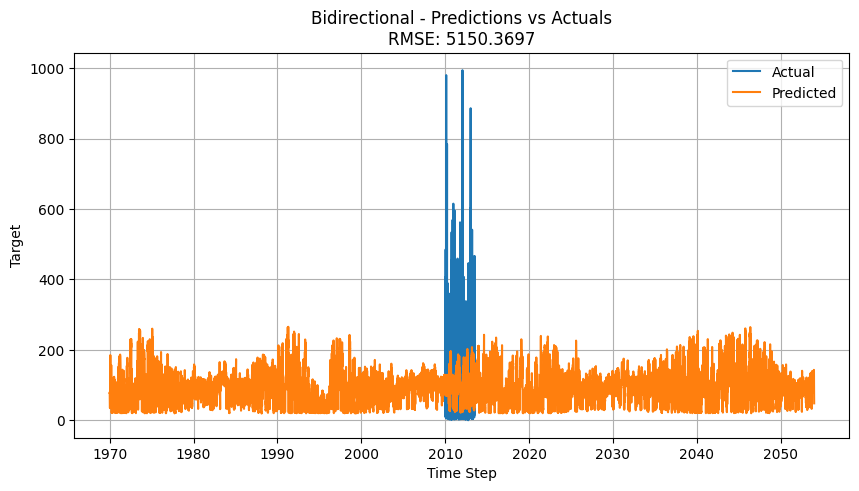

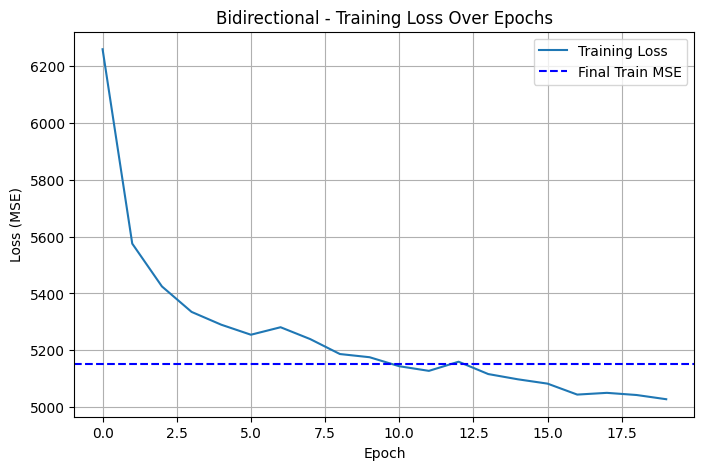

[Bidirectional] Final Training RMSE: 5150.3697


In [81]:
evaluate_and_plot_on_train_only(
    model3, history, X_train, y_train,
    scaler_y=None,
    model_name='Bidirectional'
)

# model4

This model uses a mixture of GRU and Bidirectional LSTM, with change in compiler and learning rate 

In [82]:
model4 = Sequential([
    Bidirectional(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    GRU(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model4.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model4.summary()

C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ bidirectional_5                │ ?                       │  0 (unbuilt) │
│ (Bidirectional)                │                         │              │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_17 (Dropout)           │ ?                       │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ gru_5 (GRU)                    │ ?                       │  0 (unbuilt) │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_18 (Dropout)           │ ?                       │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_18 (Dense)               │ ?                       │  0 (unbuilt) │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_19 (Dense)               │ ?                       │  0 (unbuilt) │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model4.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - lambda: 97.4732 - loss: 10370.9961
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 73.1022 - loss: 5615.5396
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - lambda: 71.7711 - loss: 5448.4849
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 70.6959 - loss: 5263.9077
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - lambda: 70.9049 - loss: 5339.5112
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - lambda: 70.5632 - loss: 5282.2588
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - lambda: 70.5316 - loss: 5281.9502
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - lambda: 70.9779 - loss: 5340.1592
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 70.8766 - loss: 5304.1606
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 70.5674 - loss: 5230.3662
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 70.5224 - loss: 5359.5952
Epoch 12/20
959/959 ━━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


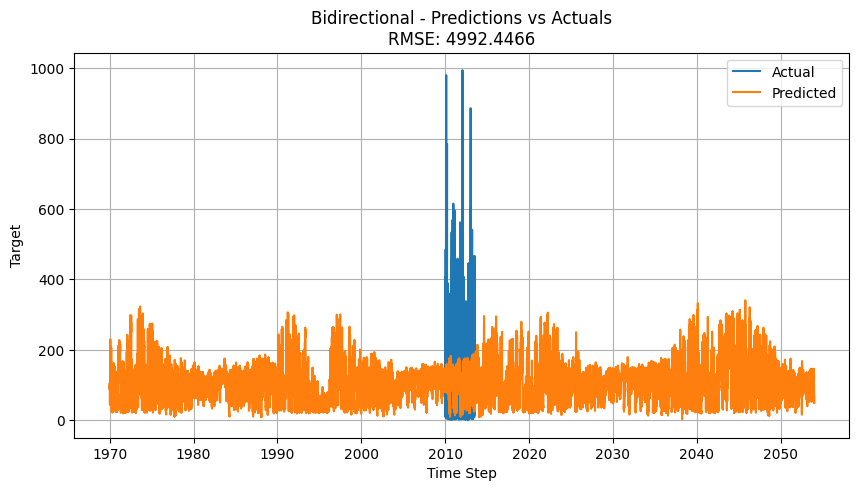

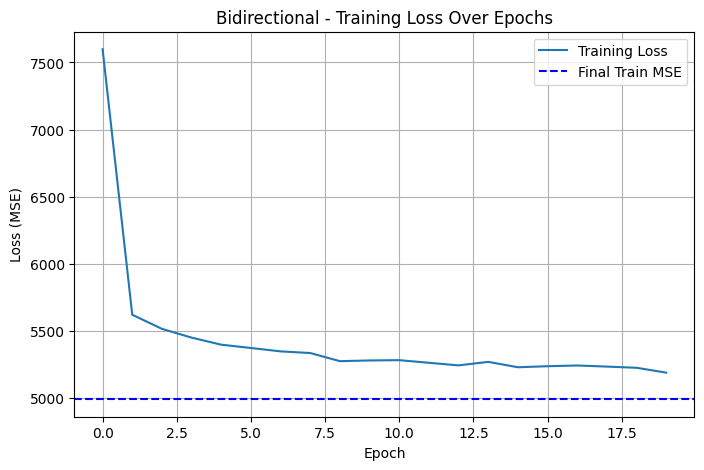

[Bidirectional] Final Training RMSE: 4992.4466


In [84]:
evaluate_and_plot_on_train_only(
    model4, history, X_train, y_train,
    scaler_y=None,
    model_name='Bidirectional'
)

# model5

This model uses a mixture of LSTM and Bidirectional LSTM, with change in compiler and learning rate 

In [85]:
model5 = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model5.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model5.summary()

C:\Users\Merveille\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                 │ (None, 1, 128)          │       70,656 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_19 (Dropout)           │ (None, 1, 128)          │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ lstm_15 (LSTM)                 │ (None, 32)              │       20,608 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_20 (Dropout)           │ (None, 32)              │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_20 (Dense)               │ (None, 32)              │        1,056 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_21 (Dense)               │ (None, 1)               │           33 │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 92,353 (360.75 KB)

 Trainable params: 92,353 (360.75 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
history = model5.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - lambda: 82.9853 - loss: 7633.5474
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - lambda: 71.0878 - loss: 5304.3115
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - lambda: 70.6534 - loss: 5262.8086
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - lambda: 70.9716 - loss: 5338.3120
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - lambda: 70.0157 - loss: 5195.5244
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - lambda: 70.2546 - loss: 5220.2842
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - lambda: 70.1837 - loss: 5248.5283
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - lambda: 69.1864 - loss: 5065.2378
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - lambda: 70.0500 - loss: 5168.7705
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - lambda: 69.6653 - loss: 5144.2334
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - lambda: 69.6105 - loss: 5136.0776
Epoch 12/20
959/959 ━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


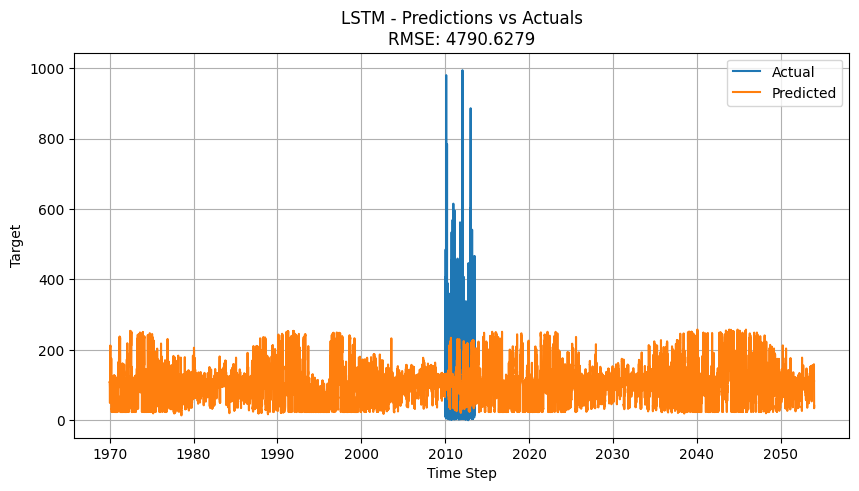

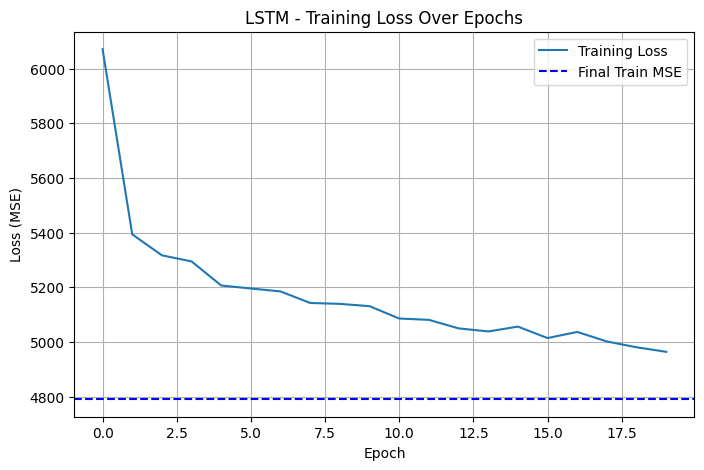

[LSTM] Final Training RMSE: 4790.6279


In [87]:
evaluate_and_plot_on_train_only(
    model5, history, X_train, y_train,
    scaler_y=None,
    model_name='LSTM'
)

In [88]:
model6 = Sequential([
    Bidirectional(LSTM(80, activation='tanh', return_sequences=True, dropout=0.25, recurrent_dropout=0.15)),
    Bidirectional(LSTM(40, activation='tanh', return_sequences=False, dropout=0.25, recurrent_dropout=0.15)),
    Dense(20, activation='relu'),
    Dropout(0.15),
    Dense(1)
])

model6.compile(
    optimizer=Adam(learning_rate=0.0007),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

# Display the model architecture
model6.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                   ┃ Output Shape            ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ bidirectional_6                │ ?                       │  0 (unbuilt) │
│ (Bidirectional)                │                         │              │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ bidirectional_7                │ ?                       │  0 (unbuilt) │
│ (Bidirectional)                │                         │              │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_22 (Dense)               │ ?                       │  0 (unbuilt) │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dropout_21 (Dropout)           │ ?                       │            0 │
├────────────────────────────────┼─────────────────────────┼──────────────┤
│ dense_23 (Dense)               │ ?                       │  0 (unbuilt) │
└────────────────────────────────┴─────────────────────────┴──────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = model6.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 13061.9492 - rmse: 113.5201
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 6578.0474 - rmse: 81.0948
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 6422.9849 - rmse: 80.1218
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 6054.3979 - rmse: 77.7956
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 6172.6035 - rmse: 78.5450
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 6266.2134 - rmse: 79.1151
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 5929.2988 - rmse: 76.9930
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 5788.4204 - rmse: 76.0442
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 6133.9048 - rmse: 78.2857
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 5818.0083 - rmse: 76.2572
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 5846.3037 - rmse: 76.4540
Epoch 12/20
959/959 ━━━━━━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


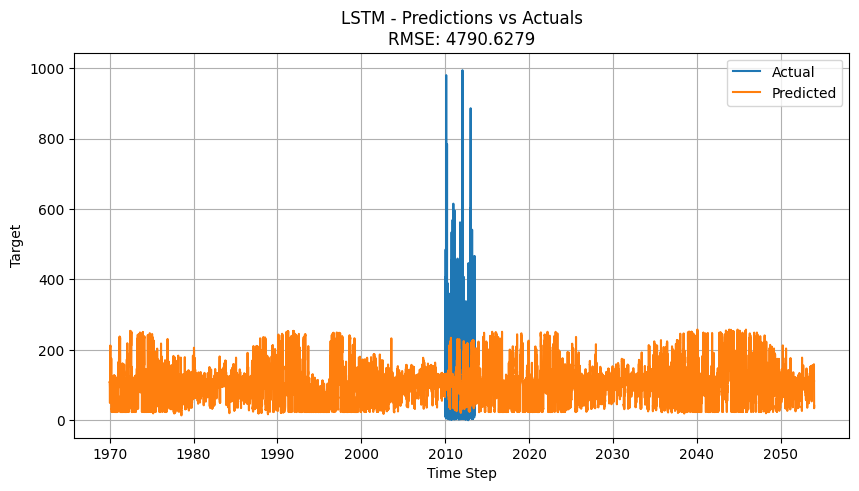

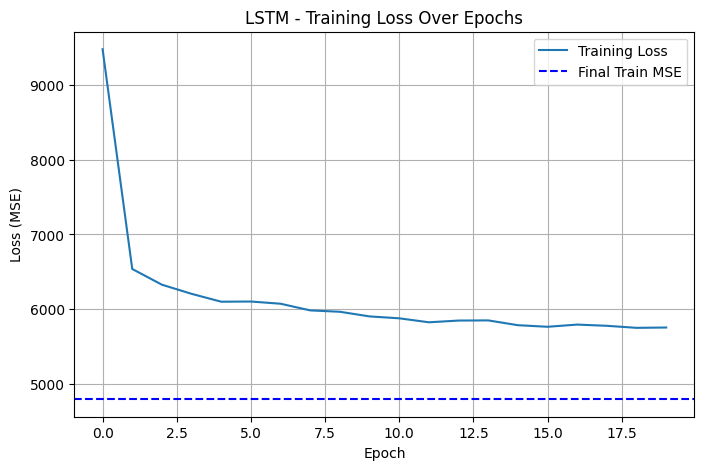

[LSTM] Final Training RMSE: 4790.6279


In [90]:
evaluate_and_plot_on_train_only(
    model5, history, X_train, y_train,
    scaler_y=None,
    model_name='LSTM'
)

In [91]:
# Prepare the test data
os.makedirs(r"C:\Users\Merveille\notebooks\assignment-1\data", exist_ok=True)

# Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using the trained model
predictions = model.predict(X_test)

# Clean predictions
predictions = np.nan_to_num(predictions)
predictions = np.round(predictions).astype(int)

# Make sure number of predictions matches number of row IDs
# assert len(predictions.flatten()) == len(sample_submission), "Mismatch between prediction count and row IDs"

# Create submission DataFrame
submission = pd.DataFrame({
    'row ID': test.index.strftime('%Y-%m-%d') + ' ' + test.index.hour.astype(str) + ':' + test.index.strftime('%M:%S'),
    'pm2.5': predictions.flatten()
})

# Save to CSV
submission_path = r"C:\Users\Merveille\notebooks\assignment-1\data\first_submission.csv"
submission.to_csv(submission_path, index=False)

# Submit to Kaggle
!kaggle competitions submit -c assignment-1-time-series-forecasting-may-2025 -f "C:/Users/Merveille/notebooks/assignment-1/data/first_submission.csv" -m "Test Submitted"

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Successfully submitted to Assignment 1- Time Series Forecasting May 2025



  0%|          | 0.00/309k [00:00<?, ?B/s]
  5%|5         | 16.0k/309k [00:00<00:04, 72.8kB/s]
 52%|#####1    | 160k/309k [00:00<00:00, 583kB/s]  
100%|##########| 309k/309k [00:00<00:00, 900kB/s]
100%|##########| 309k/309k [00:01<00:00, 186kB/s]
